In [ ]:
# Import libraries need for Modelling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('Data file.csv')

In [ ]:
pd.set_option("display.max_columns", 100)

In [ ]:
dt

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [ ]:
#NAN values
print('The NAN values in train is\n',dt.isna().sum())
print('*'*100)

The NAN values in train is
 Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int

<AxesSubplot:>

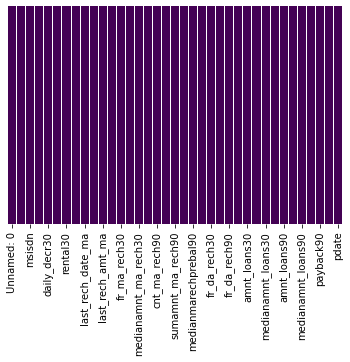

In [ ]:
sns.heatmap(dt.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [ ]:
# Dataframe columns
print('The columns in train is', dt.columns)
print('*'*100)

The columns in train is Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')
****************************************************************************************************


In [ ]:
# To find the data type of the dataset
for col in dt:
    print ('This column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)

This column Unnamed: 0 has [     1      2      3 ... 209591 209592 209593] unique elements
****************************************************************************************************
This column label has [0 1] unique elements
****************************************************************************************************
This column msisdn has ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339'] unique elements
****************************************************************************************************
This column aon has [2.72000000e+02 7.12000000e+02 5.35000000e+02 ... 8.03380622e+05
 5.81435484e+05 8.11881373e+05] unique elements
****************************************************************************************************
This column daily_decr30 has [ 3055.05       12122.          1398.         ... 11843.11166667
 12488.22833333  4489.362     ] unique elements
********************************************************

In [ ]:
# Getting information on the dataset
print ('The training dataset consists of', dt.info())
print('*'*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [ ]:
# To find the correlection in the dataset
dt.corr()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,0.003320,0.003181,0.000123,-0.001371,0.001258,0.002329,-0.000249,0.000523,-0.000298,-0.001947,0.000888,-0.002504,-0.001324,-0.002827,0.001725,0.002387,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260


In [ ]:
# Analysing the data 
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,209593.0,104797.000000,60504.431823,1.000000,52399.000,104797.000000,157195.00,209593.000000
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000


<AxesSubplot:>

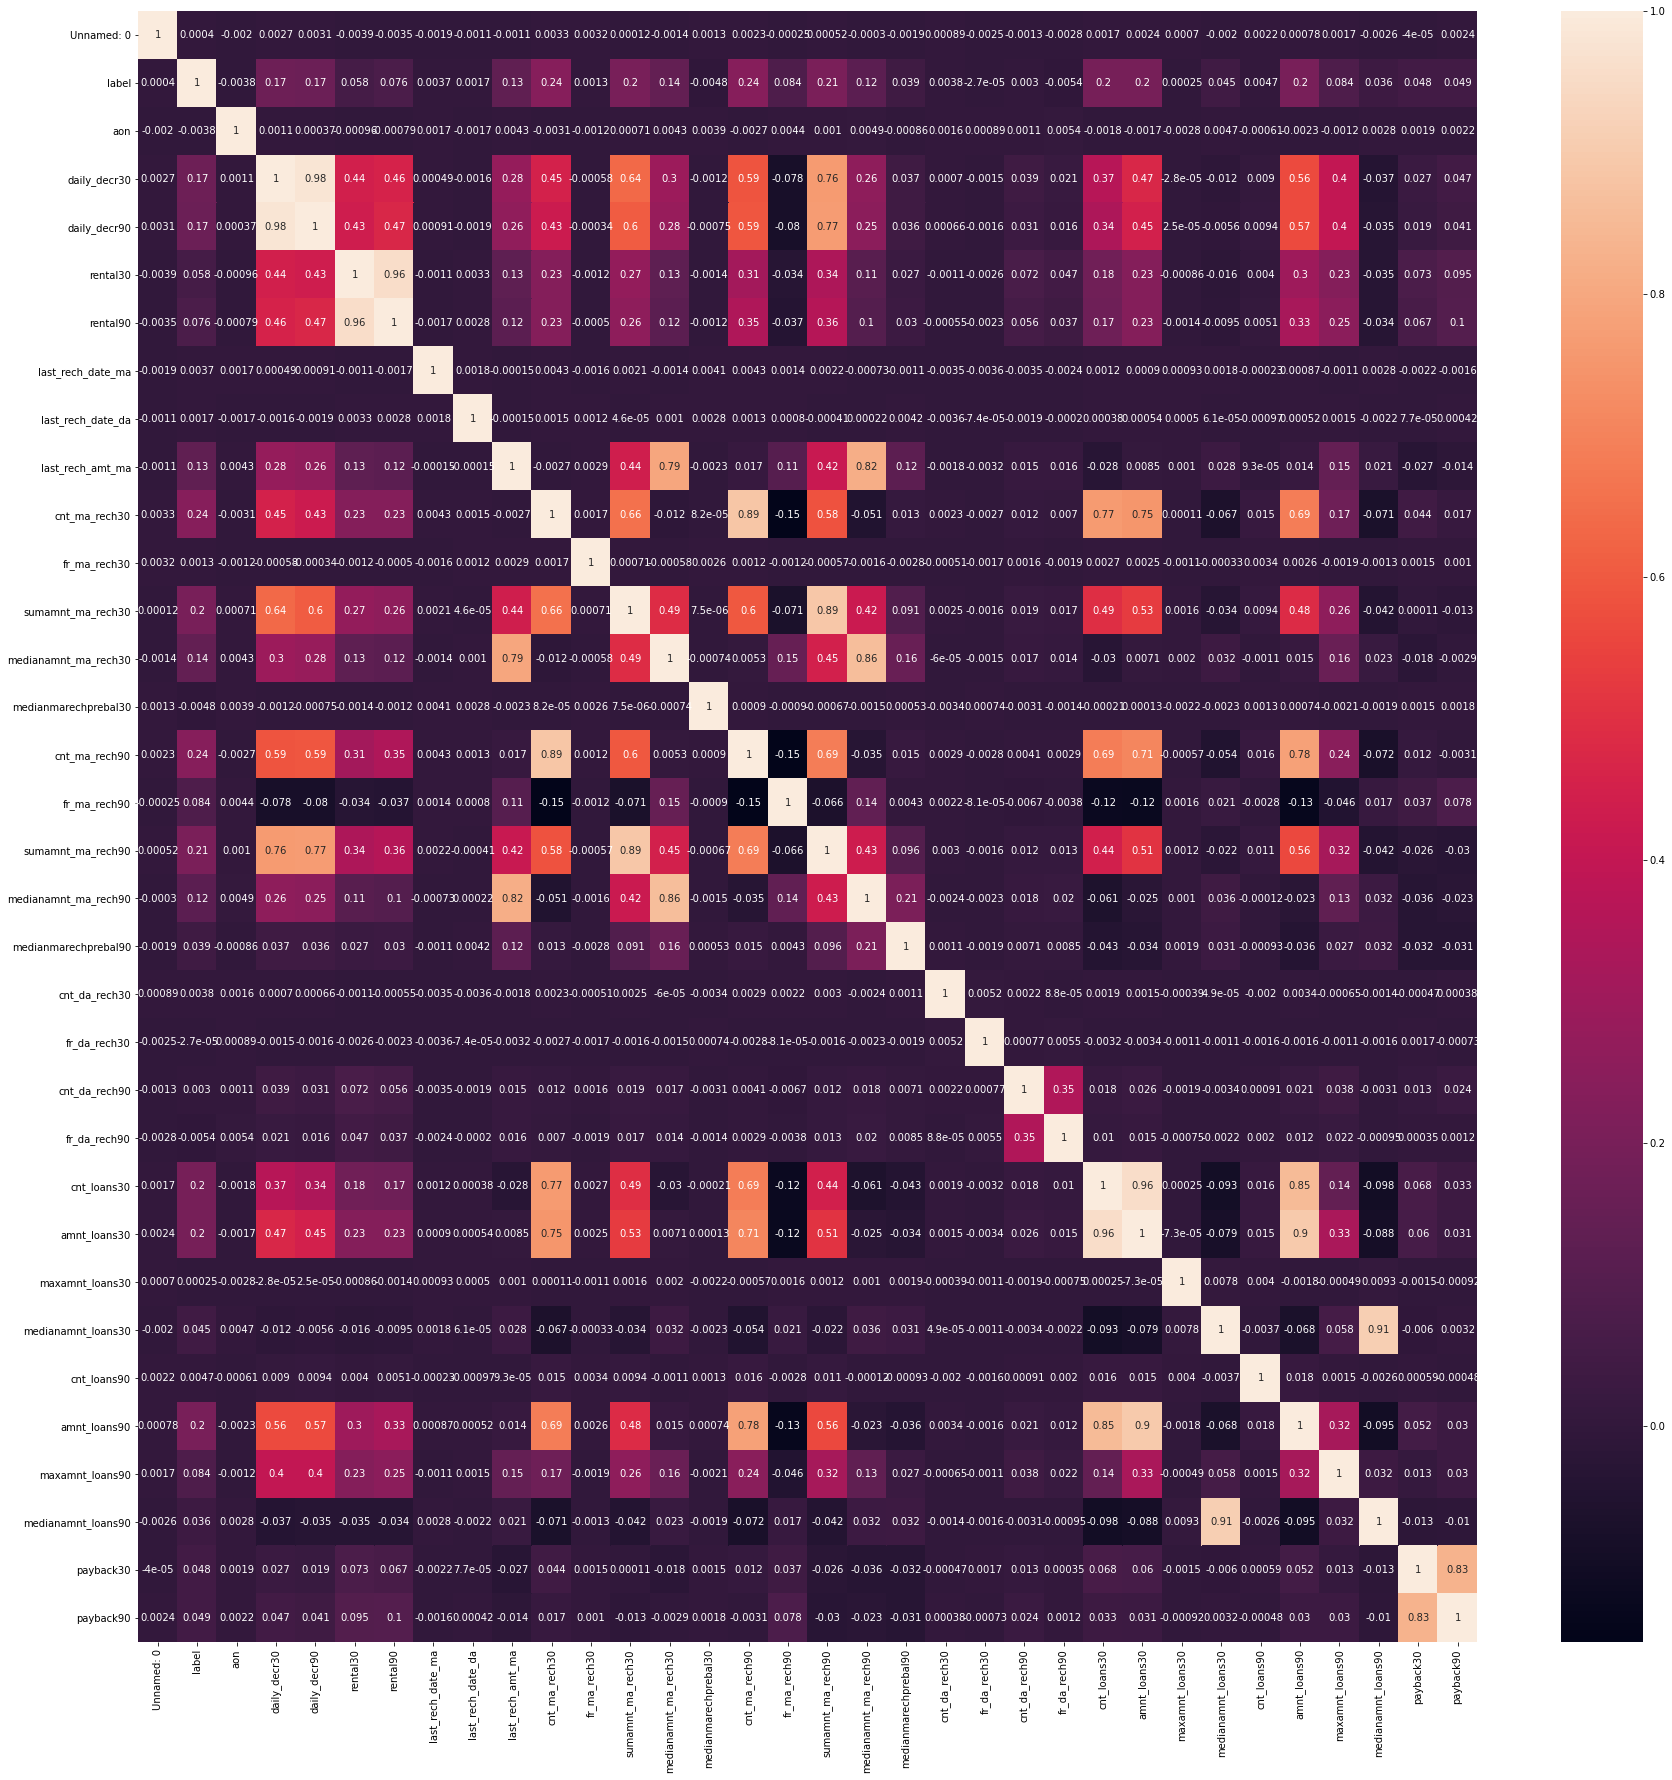

In [ ]:
e=dt.corr()
# Ploting the heatmap for better understanding
plt.subplots(figsize=(30,30))
sns.heatmap(e,annot=True)

In [ ]:
dt.skew()

Unnamed: 0               0.000000
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

In [ ]:
e['label'].sort_values()

fr_da_rech90           -0.005418
medianmarechprebal30   -0.004829
aon                    -0.003785
fr_da_rech30           -0.000027
maxamnt_loans30         0.000248
Unnamed: 0              0.000403
fr_ma_rech30            0.001330
last_rech_date_da       0.001711
cnt_da_rech90           0.002999
last_rech_date_ma       0.003728
cnt_da_rech30           0.003827
cnt_loans90             0.004733
medianamnt_loans90      0.035747
medianmarechprebal90    0.039300
medianamnt_loans30      0.044589
payback30               0.048336
payback90               0.049183
rental30                0.058085
rental90                0.075521
maxamnt_loans90         0.084144
fr_ma_rech90            0.084385
medianamnt_ma_rech90    0.120855
last_rech_amt_ma        0.131804
medianamnt_ma_rech30    0.141490
daily_decr90            0.166150
daily_decr30            0.168298
cnt_loans30             0.196283
amnt_loans30            0.197272
amnt_loans90            0.199788
sumamnt_ma_rech30       0.202828
sumamnt_ma

<AxesSubplot:>

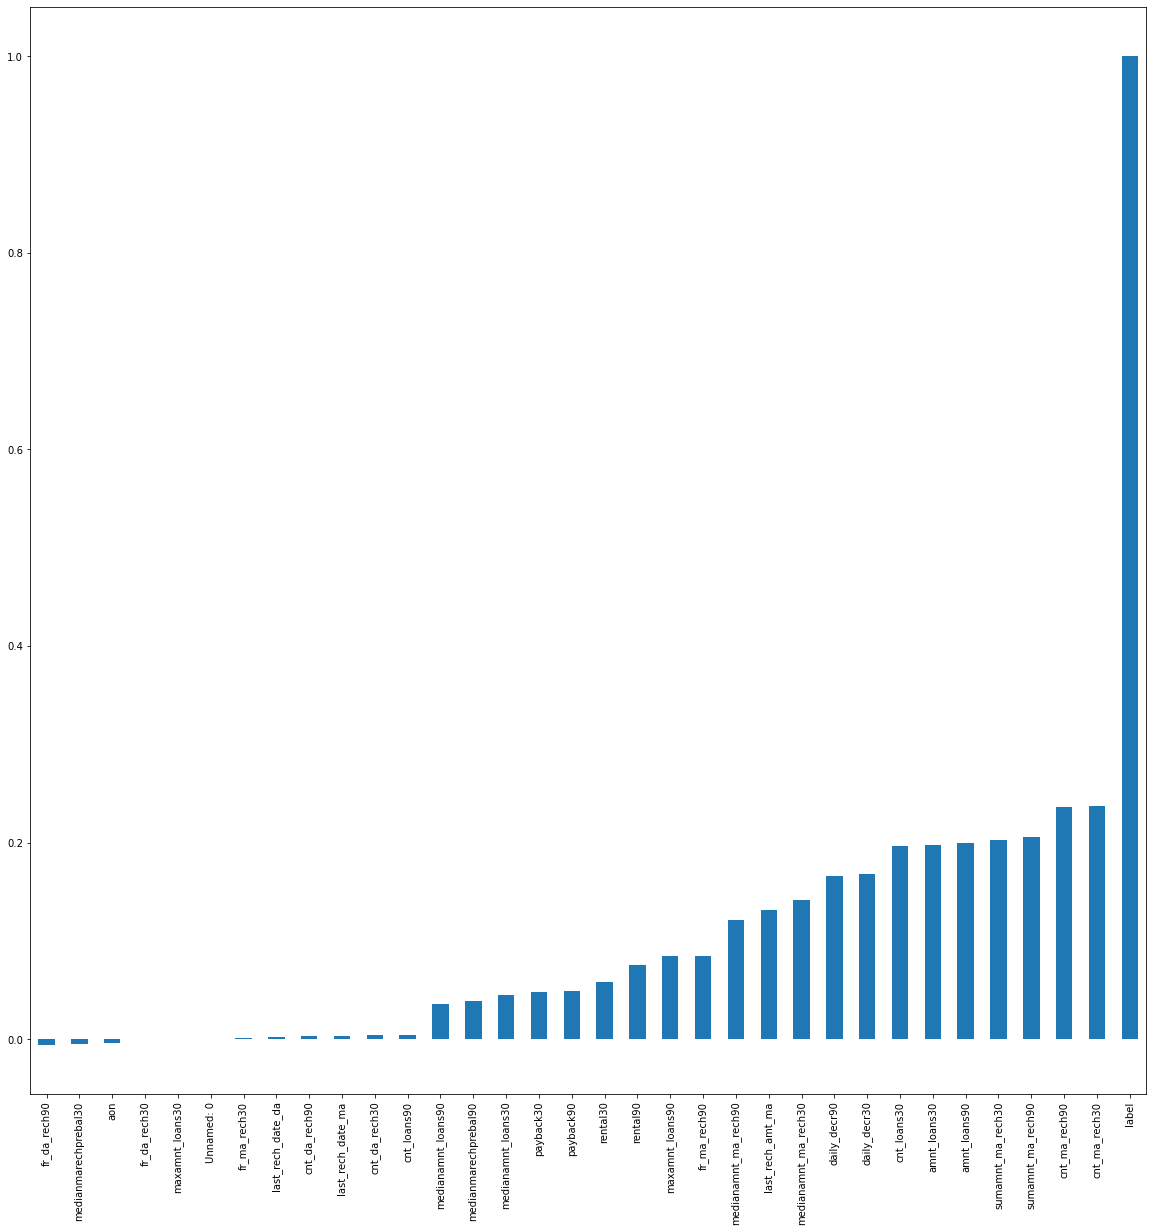

In [ ]:
(e['label'].sort_values()).plot(kind='bar', figsize=(20,20))

# Explorative Data Analysis

In [ ]:
dt.drop(columns=['Unnamed: 0','msisdn','pcircle'],inplace=True)

In [ ]:
dt

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


In [ ]:
#Making the new column Day, Month and year from pdate column
dt['Day']=pd.to_datetime(dt['pdate'],format='%Y/%m/%d').dt.day
dt['Month']=pd.to_datetime(dt['pdate'],format='%Y/%m/%d').dt.month
dt['Year']=pd.to_datetime(dt['pdate'],format='%Y/%m/%d').dt.year

In [ ]:
dt

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Day,Month,Year
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,20,7,2016
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,10,8,2016
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,19,8,2016
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6,2016
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,22,6,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17,17,6,2016
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12,12,6,2016
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29,29,7,2016
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25,25,7,2016


In [ ]:
dt.drop(columns=['pdate','Year'],inplace=True)

<AxesSubplot:>

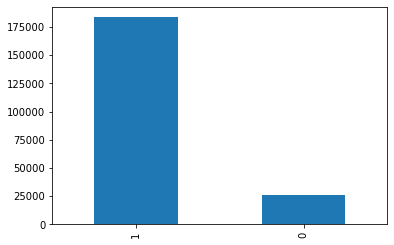

In [ ]:
#Checking the number of number of defaulter and non defaulter customers.
(dt['label'].value_counts()).plot(kind='bar')

In [ ]:
dt['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

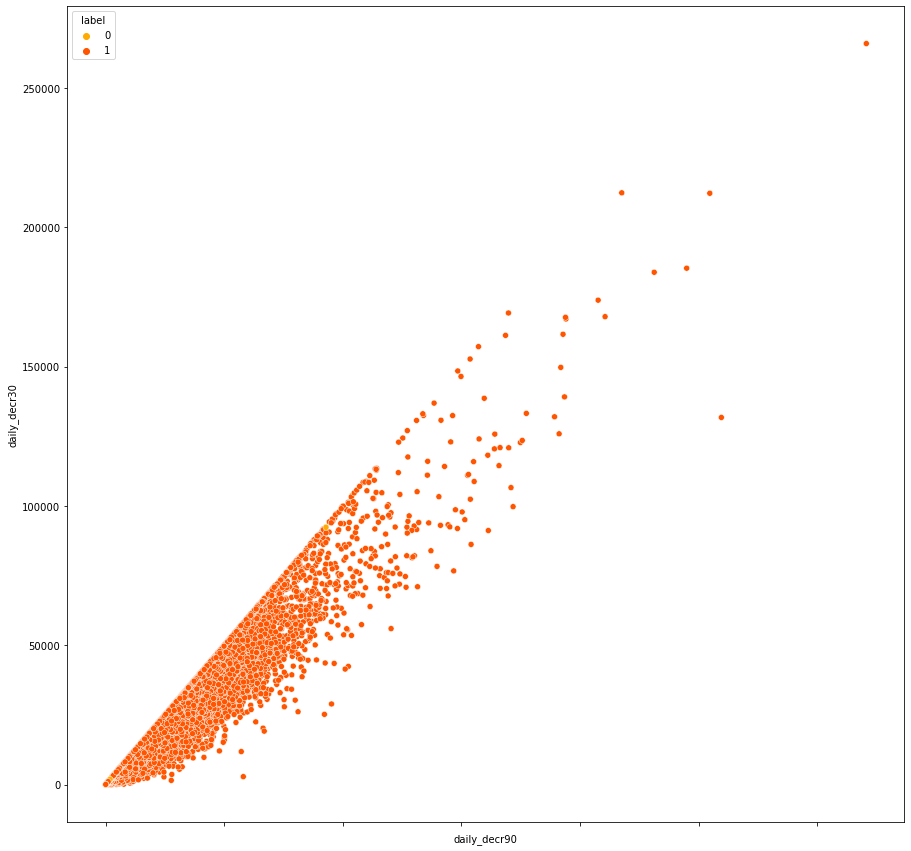

Executing shutdown due to inactivity...


2022-09-02 11:10:21,295 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-09-02 11:10:23,909 - INFO     - Executing shutdown...


In [ ]:
plt.subplots(figsize=(15,15))
chart =sns.scatterplot(x="daily_decr90", y='daily_decr30',hue='label', data=df, palette='autumn_r')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

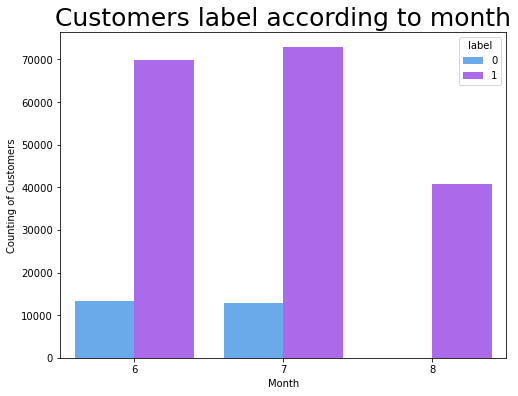

In [ ]:
#Customer label according to Month
plt.figure(figsize=(8,6))
sns.countplot(x="Month", hue='label', data=dt, palette='cool')
plt.title("Customers label according to month", fontsize=25)
plt.xlabel('Month')
plt.ylabel('Counting of Customers')
plt.show()

<AxesSubplot:xlabel='label'>

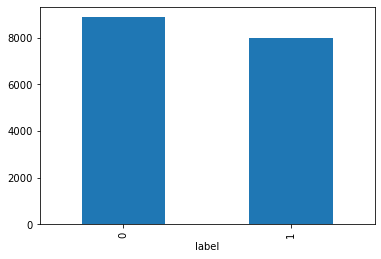

In [ ]:
(dt.groupby('label')['aon'].mean()).plot(kind='bar')

In [ ]:
dt

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7


In [ ]:
sns.pairplot(dt)

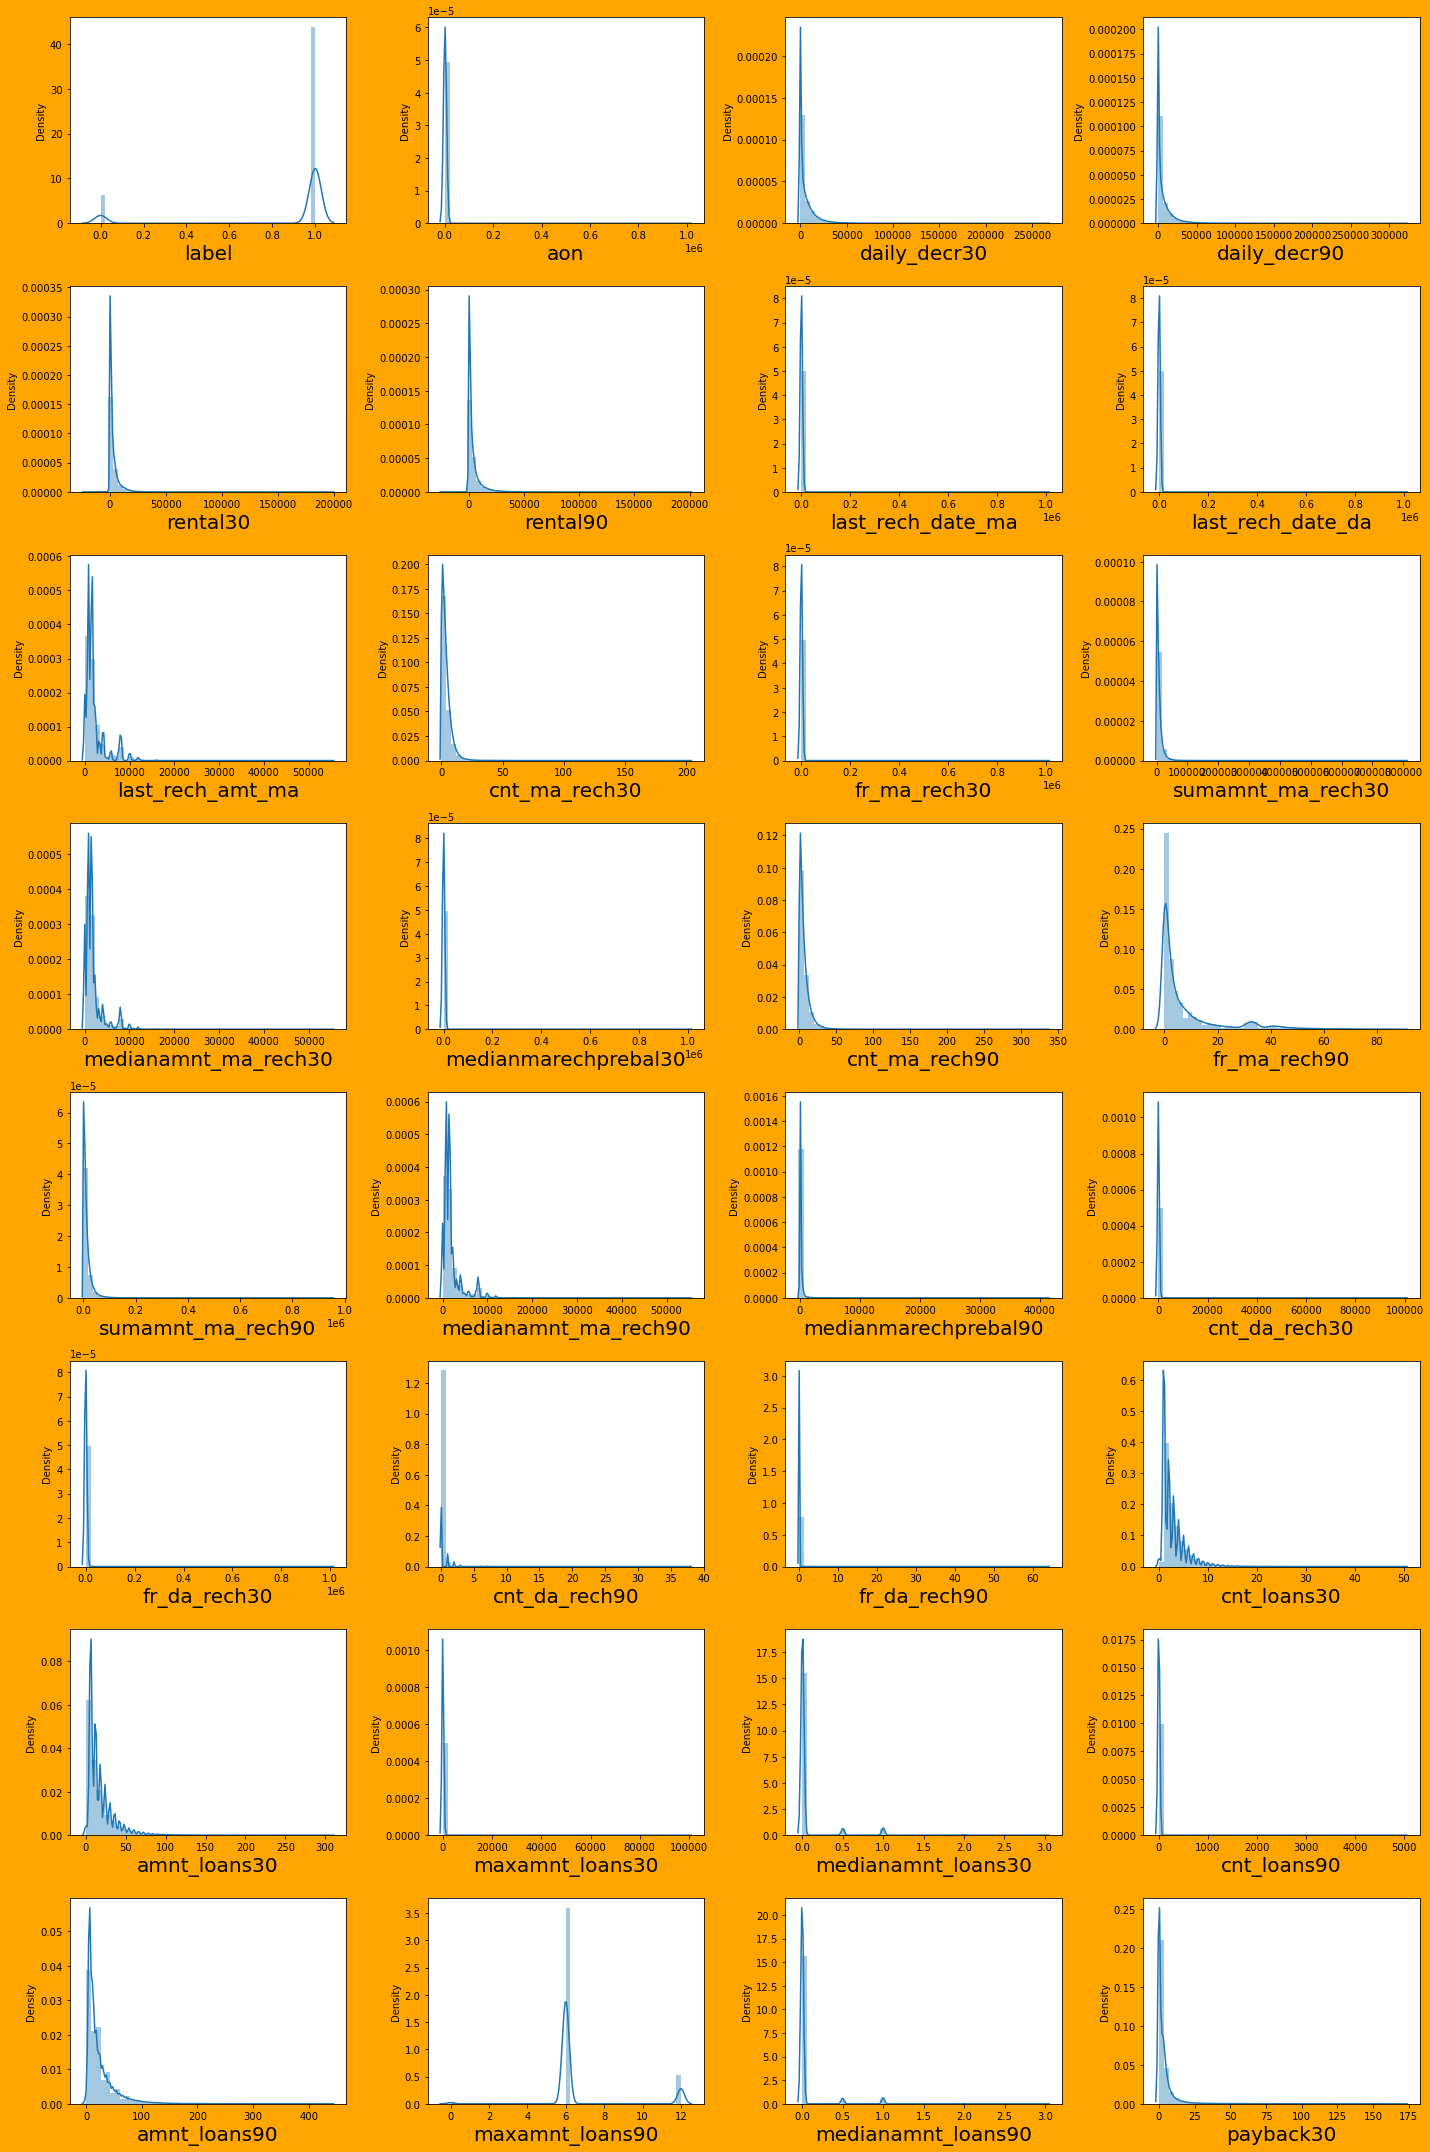

In [ ]:
# The data distribution have to be analyzed
plt.figure(figsize=(20,30), facecolor='orange')
plotnumber=1
for column in dt[:-1]:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.distplot(dt[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

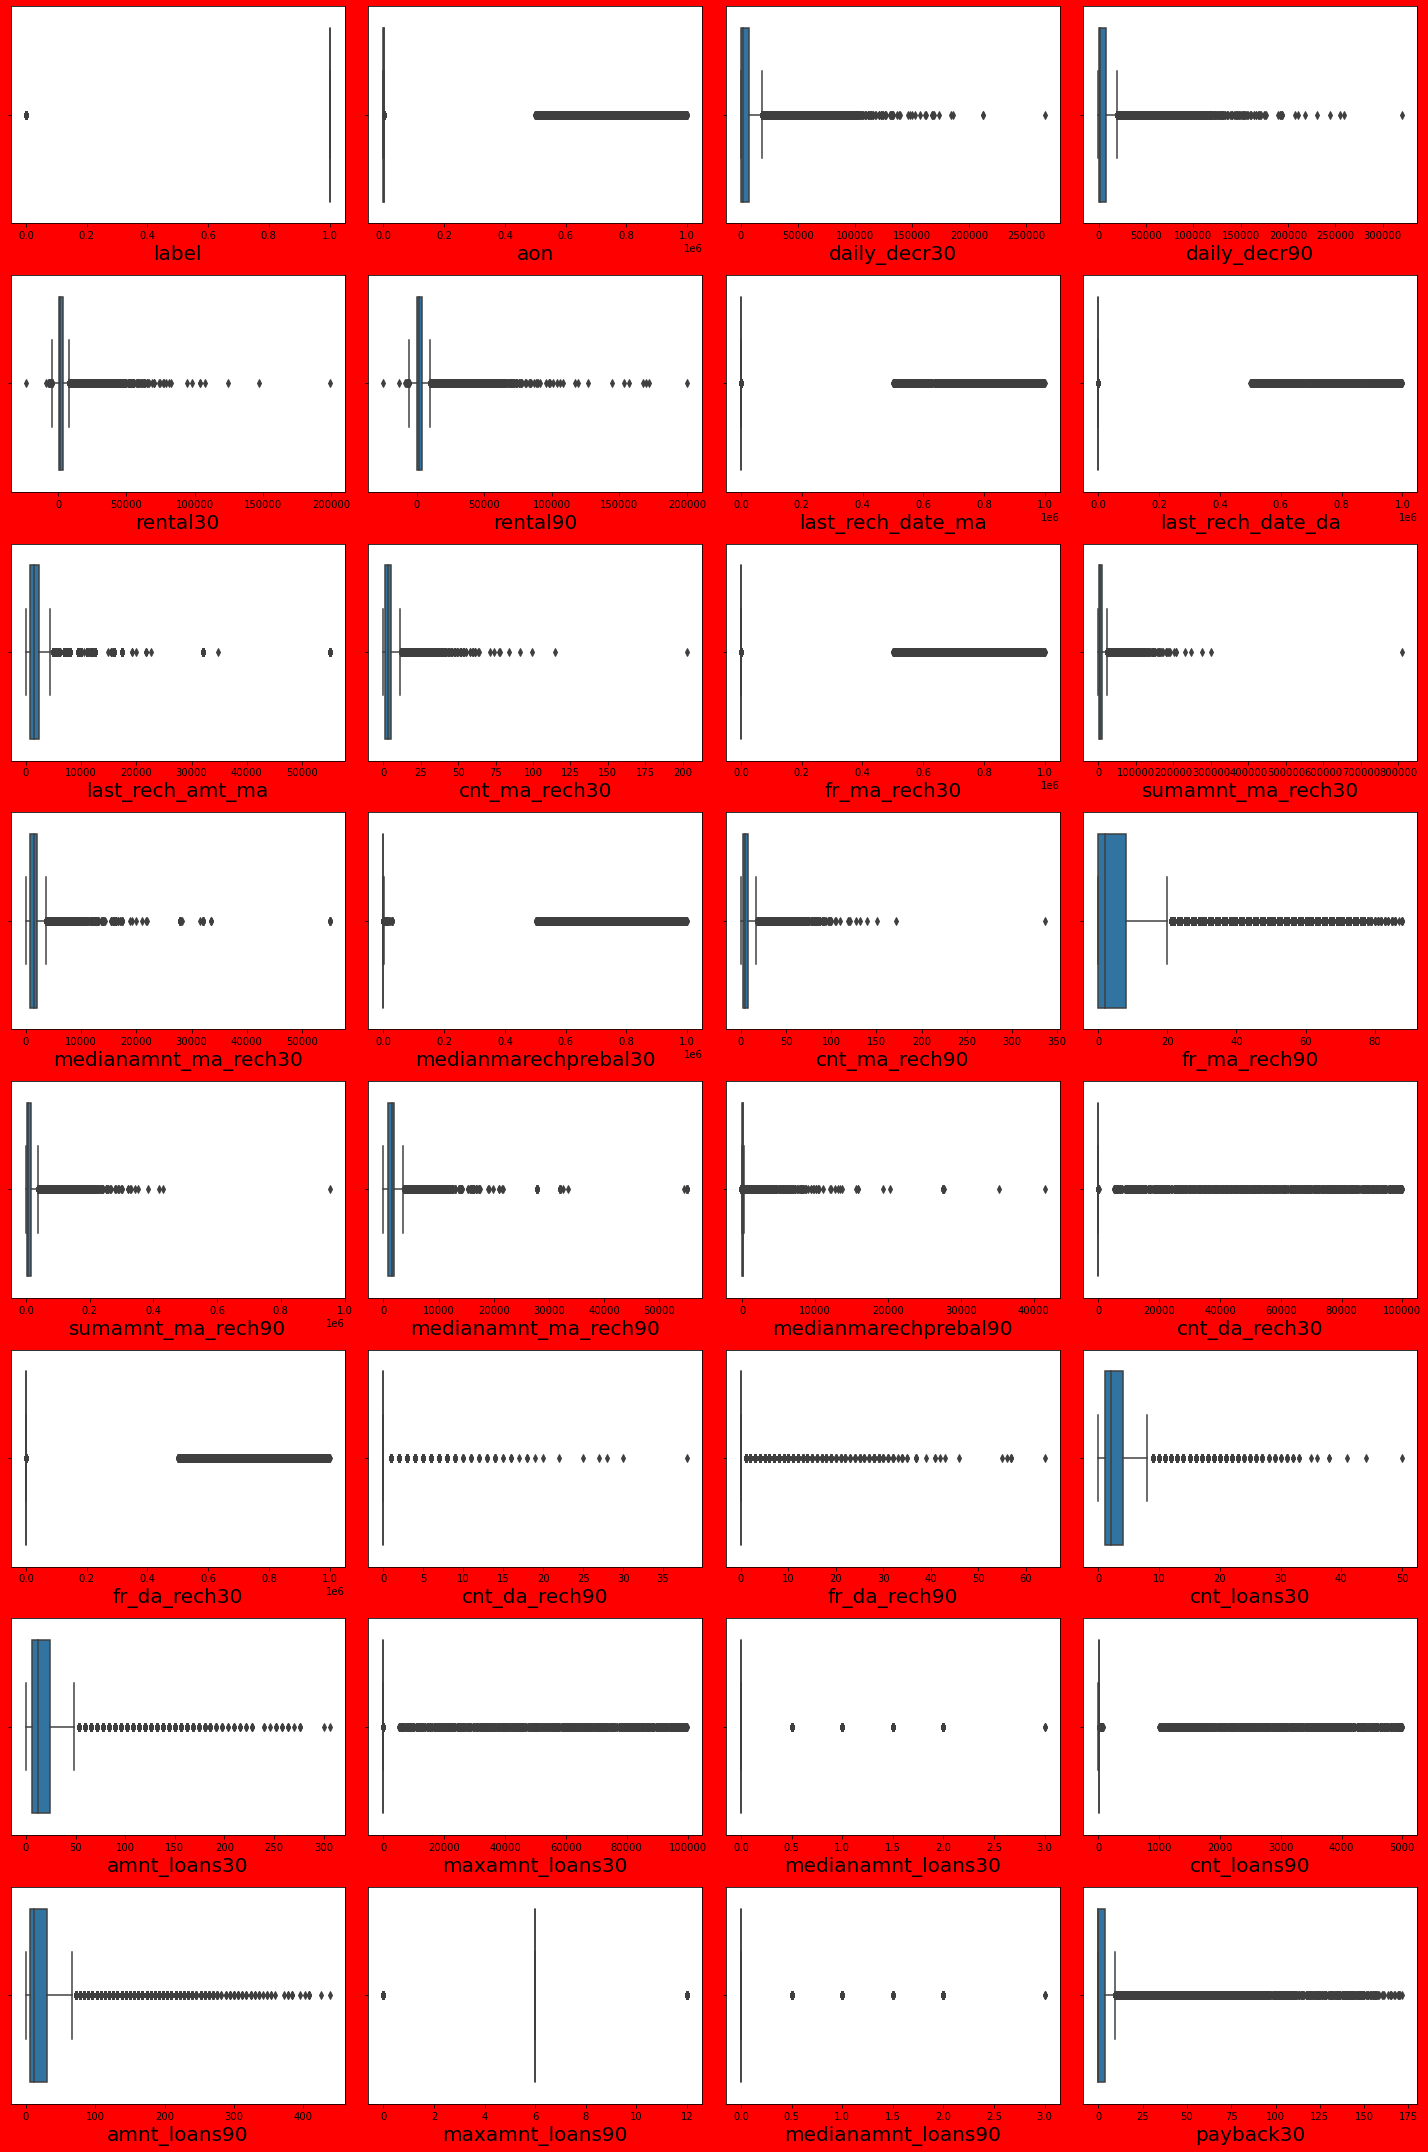

In [ ]:
plt.figure(figsize=(20,30), facecolor='red')
plotnumber=1
for column in dt[:-1]:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(dt[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
dt.drop_duplicates(inplace=True)

In [ ]:
from scipy.stats import zscore
z=np.abs(zscore(dt))
z

array([[2.64935018, 0.10358473, 0.25237   , ..., 2.39398367, 0.66364934,
        0.27324694],
       [0.37745105, 0.09777242, 0.73091668, ..., 0.41926306, 0.52133598,
        1.62198858],
       [0.37745105, 0.10011055, 0.43207267, ..., 0.41926306, 0.54515081,
        1.62198858],
       ...,
       [0.37745105, 0.09379627, 0.70067198, ..., 0.04739711, 1.73013613,
        0.27324694],
       [0.37745105, 0.08429843, 0.77063318, ..., 0.59932627, 1.25614201,
        0.27324694],
       [0.37745105, 0.08629311, 0.09682266, ..., 0.41926306, 0.87683157,
        0.27324694]])

In [ ]:
ab=dt[(z<3).all(axis=1)]

In [ ]:
ab

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7


In [ ]:
dt

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7


In [ ]:
#Comparing the data set for columns some of the rows were neglected so that the data meets the normalization requirement

In [ ]:
ab['label'].value_counts()

1    139066
0     22371
Name: label, dtype: int64

In [ ]:
# Assignment of X and y
X=ab.drop(['label'], axis=1)
y=ab.label

In [ ]:
#Upsmapling have to be performed to remove the biases
from imblearn.over_sampling import SMOTE

In [ ]:
osmp=SMOTE(0.95)

In [ ]:
x_train,x_test,y_train, y_test=train_test_split(X,y)

In [ ]:
X_train_ns,y_train_ns=osmp.fit_resample(x_train,y_train)

In [ ]:
# Importing PCA components
from sklearn.decomposition import PCA

In [ ]:
pca=PCA()
pca.fit_transform(X_train_ns)

array([[ 6.19842331e+04,  2.17381168e+03, -3.97393982e+03, ...,
         1.12343355e-02, -2.25147402e-12, -1.39373556e-12],
       [-8.69456479e+03,  1.18621852e+03, -2.43782237e+03, ...,
        -7.08139397e-05, -5.31061760e-13, -7.92857818e-13],
       [-9.32318140e+03,  3.78151972e+02, -1.81880330e+03, ...,
        -5.89310754e-04,  2.05642402e-14,  7.82918987e-14],
       ...,
       [ 2.31403911e+04, -1.28999688e+04,  4.67810194e+03, ...,
        -6.65042682e-04,  2.44406127e-14,  1.07013483e-14],
       [-9.25961779e+03,  5.64612177e+02, -1.44541840e+03, ...,
        -6.58891729e-04,  4.89474495e-15, -3.07669916e-15],
       [-9.09343829e+03,  1.07919080e+03, -4.17454408e+02, ...,
        -6.85821646e-04,  8.62987873e-15, -5.97608283e-16]])

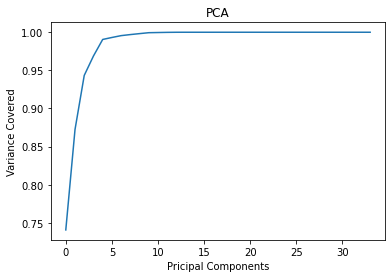

In [ ]:
# Ploting Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Pricipal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [ ]:
pca=PCA(n_components=5)
new_pcomp=pca.fit_transform(X_train_ns)
prin_comp=pd.DataFrame(new_pcomp, columns=['PC1','PC2','PC3','PC4','PC5'])

In [ ]:
prin_comp

,PC1,PC2,PC3,PC4,PC5
0,61984.233082,2173.811679,-3973.939817,7899.116982,2229.622302
1,-8694.564789,1186.218525,-2437.822372,900.815558,-686.005186
2,-9323.181403,378.151972,-1818.803299,1121.509730,-555.763505
3,17858.044966,3429.590972,-6201.228284,-1104.821886,585.047670
4,1144.261629,565.727464,-2173.541013,347.533757,1422.768619
...,...,...,...,...,...
203315,-2998.850883,-2202.688122,-312.555343,-771.975967,-461.586642
203316,-8072.495371,-623.846429,-1649.180581,-52.062852,158.775069
203317,23140.391147,-12899.968829,4678.101944,-528.788361,-6132.671830
203318,-9259.617787,564.612177,-1445.418400,1110.008429,-544.666664


In [ ]:
# Importing machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score

In [ ]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,500):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7341719283590891 random_state 1
accuracy of the optimum model 0.7341719283590891 random_state 1
accuracy of the model 0.7374149325602536 random_state 2
accuracy of the optimum model 0.7374149325602536 random_state 2
accuracy of the model 0.7342210647863794 random_state 3
accuracy of the model 0.738397661106061 random_state 4
accuracy of the optimum model 0.738397661106061 random_state 4
accuracy of the model 0.7361865218779943 random_state 5
accuracy of the model 0.7318870844900868 random_state 6
accuracy of the model 0.735105520477606 random_state 7
accuracy of the model 0.7364322040144461 random_state 8
accuracy of the model 0.7334840183770238 random_state 9
accuracy of the model 0.7389135935926099 random_state 10
accuracy of the optimum model 0.7389135935926099 random_state 10
accuracy of the model 0.7361619536643491 random_state 11
accuracy of the model 0.7335331548043141 random_state 12
accuracy of the model 0.736284794732575 random_state 13
accuracy of the

KeyboardInterrupt: 

In [ ]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.74223030243471 in random state 29


In [ ]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,500):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    kn=KNeighborsClassifier()
    kn.fit(x_train, y_train)
    pred=kn.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8458098911628136 random_state 1
accuracy of the optimum model 0.8458098911628136 random_state 1
accuracy of the model 0.8450974129671032 random_state 2
accuracy of the model 0.8485369628774292 random_state 3
accuracy of the optimum model 0.8485369628774292 random_state 3
accuracy of the model 0.8490283271503329 random_state 4
accuracy of the optimum model 0.8490283271503329 random_state 4
accuracy of the model 0.8498882146279144 random_state 5
accuracy of the optimum model 0.8498882146279144 random_state 5
accuracy of the model 0.8462521190084269 random_state 6
accuracy of the model 0.8452202540353291 random_state 7
accuracy of the model 0.8473576886224603 random_state 8
accuracy of the model 0.8481684396727514 random_state 9
accuracy of the model 0.8492740092867848 random_state 10
accuracy of the model 0.8471611429132988 random_state 11
accuracy of the model 0.8509692160283026 random_state 12
accuracy of the optimum model 0.8509692160283026 random_state 12
accu

In [ ]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8529346731199174 in random state 238


In [ ]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    de=DecisionTreeClassifier()
    de.fit(x_train, y_train)
    pred=de.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8238213399503722 random_state 1
accuracy of the optimum model 0.8238213399503722 random_state 1
accuracy of the model 0.8242635677959855 random_state 2
accuracy of the optimum model 0.8242635677959855 random_state 2
accuracy of the model 0.8235756578139204 random_state 3
accuracy of the model 0.8246320910006634 random_state 4
accuracy of the optimum model 0.8246320910006634 random_state 4
accuracy of the model 0.8247303638552441 random_state 5
accuracy of the optimum model 0.8247303638552441 random_state 5
accuracy of the model 0.8264501388104071 random_state 6
accuracy of the optimum model 0.8264501388104071 random_state 6
accuracy of the model 0.8250497506326315 random_state 7
accuracy of the model 0.8268923666560204 random_state 8
accuracy of the optimum model 0.8268923666560204 random_state 8
accuracy of the model 0.8247795002825344 random_state 9
accuracy of the model 0.8260324791784389 random_state 10
accuracy of the model 0.8225192246271773 random_state 1

In [ ]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8331572611355428 in random state 619


In [ ]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,1000):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    xe=XGBRFClassifier()
    xe.fit(x_train, y_train)
    pred=xe.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

[21:10:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.7703363388448026 random_state 1
accuracy of the optimum model 0.7703363388448026 random_state 1
[21:11:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.7700169520674152 random_state 2
[21:11:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was

KeyboardInterrupt: 

In [ ]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.7777559393656487 in random state 29


In [ ]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    ad=AdaBoostClassifier()
    ad.fit(x_train, y_train)
    pred=ad.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7592560744908238 random_state 1
accuracy of the optimum model 0.7592560744908238 random_state 1
accuracy of the model 0.7590349605680171 random_state 2
accuracy of the model 0.7553988649485296 random_state 3
accuracy of the model 0.7595017566272756 random_state 4
accuracy of the optimum model 0.7595017566272756 random_state 4
accuracy of the model 0.7611232587278579 random_state 5
accuracy of the optimum model 0.7611232587278579 random_state 5
accuracy of the model 0.7553988649485296 random_state 6
accuracy of the model 0.7560376385033044 random_state 7
accuracy of the model 0.7573643220401445 random_state 8
accuracy of the model 0.7575117313220155 random_state 9
accuracy of the model 0.7619585779917942 random_state 10
accuracy of the optimum model 0.7619585779917942 random_state 10
accuracy of the model 0.7581013684495 random_state 11
accuracy of the model 0.7580276638085645 random_state 12
accuracy of the model 0.7596983023364371 random_state 13
accuracy of th

KeyboardInterrupt: 

In [ ]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.7647593543473454 in random state 29


In [ ]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    gc=GradientBoostingClassifier()
    gc.fit(x_train, y_train)
    pred=gc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

In [ ]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

In [ ]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    sc=SVC()
    sc.fit(x_train, y_train)
    pred=sc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

In [ ]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

In [ ]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    c=RandomForestClassifier()
    c.fit(x_train, y_train)
    pred=c.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8760600771859098 random_state 1
accuracy of the optimum model 0.8760600771859098 random_state 1
accuracy of the model 0.8767483591848775 random_state 2
accuracy of the optimum model 0.8767483591848775 random_state 2
accuracy of the model 0.8769450111845825 random_state 3
accuracy of the optimum model 0.8769450111845825 random_state 3
accuracy of the model 0.8777070376834395 random_state 4
accuracy of the optimum model 0.8777070376834395 random_state 4
accuracy of the model 0.8742656276886016 random_state 5
accuracy of the model 0.8766746146849881 random_state 6
accuracy of the model 0.8758388436862418 random_state 7
accuracy of the model 0.8767975221848037 random_state 8
accuracy of the model 0.8778299451832551 random_state 9
accuracy of the optimum model 0.8778299451832551 random_state 9
accuracy of the model 0.8781249231828127 random_state 10
accuracy of the optimum model 0.8781249231828127 random_state 10
accuracy of the model 0.8791081831813378 random_state 

KeyboardInterrupt: 

In [ ]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8795752316806371 in random state 13


In [ ]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=29)
lr=LogisticRegression()
lr.fit(x_train, y_train)
pred1=lr.predict(x_test)
acc=accuracy_score(y_test,pred1)
print('accuracy of the model', acc,'random_state', 29)
print(classification_report(y_test,pred1))

accuracy of the model 0.7366220735785953 random_state 29
              precision    recall  f1-score   support

           0       0.69      0.84      0.76     19782
           1       0.81      0.64      0.71     20882

    accuracy                           0.74     40664
   macro avg       0.75      0.74      0.73     40664
weighted avg       0.75      0.74      0.73     40664



In [ ]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=238)
kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
pred2=kn.predict(x_test)
acc=accuracy_score(y_test,pred2)
print('accuracy of the model', acc,'random_state', 238)
print(classification_report(y_test,pred2))

accuracy of the model 0.848883533346449 random_state 238
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     19835
           1       0.89      0.80      0.84     20829

    accuracy                           0.85     40664
   macro avg       0.85      0.85      0.85     40664
weighted avg       0.85      0.85      0.85     40664



In [ ]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=619)
de=DecisionTreeClassifier()
de.fit(x_train, y_train)
pred3=de.predict(x_test)
acc=accuracy_score(y_test,pred3)
print('accuracy of the model', acc,'random_state', 619)
print(classification_report(y_test,pred3))

accuracy of the model 0.8266279756049577 random_state 619
              precision    recall  f1-score   support

           0       0.81      0.84      0.82     19710
           1       0.84      0.82      0.83     20954

    accuracy                           0.83     40664
   macro avg       0.83      0.83      0.83     40664
weighted avg       0.83      0.83      0.83     40664



In [ ]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=29)
xe=XGBRFClassifier()
xe.fit(x_train, y_train)
pred4=xe.predict(x_test)
acc=accuracy_score(y_test,pred4)
print('accuracy of the model', acc,'random_state', 29)
print(classification_report(y_test,pred4))

[08:25:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.7701160731851269 random_state 29
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     19782
           1       0.77      0.78      0.78     20882

    accuracy                           0.77     40664
   macro avg       0.77      0.77      0.77     40664
weighted avg       0.77      0.77      0.77     40664



In [ ]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=29)
ad=AdaBoostClassifier()
ad.fit(x_train, y_train)
pred5=ad.predict(x_test)
acc=accuracy_score(y_test,pred5)
print('accuracy of the model', acc,'random_state', 29)
print(classification_report(y_test,pred5))

accuracy of the model 0.7565414125516428 random_state 29
              precision    recall  f1-score   support

           0       0.74      0.78      0.76     19782
           1       0.78      0.73      0.76     20882

    accuracy                           0.76     40664
   macro avg       0.76      0.76      0.76     40664
weighted avg       0.76      0.76      0.76     40664



In [ ]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=616)
gc=GradientBoostingClassifier()
gc.fit(x_train, y_train)
pred6=gc.predict(x_test)
acc=accuracy_score(y_test,pred6)
print('accuracy of the model', acc,'random_state', 616)
print(classification_report(y_test,pred6))

accuracy of the model 0.7704111745032461 random_state 616
              precision    recall  f1-score   support

           0       0.76      0.78      0.77     19837
           1       0.78      0.76      0.77     20827

    accuracy                           0.77     40664
   macro avg       0.77      0.77      0.77     40664
weighted avg       0.77      0.77      0.77     40664



In [ ]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=616)
sc=SVC()
sc.fit(x_train, y_train)
pred7=sc.predict(x_test)
acc=accuracy_score(y_test,pred7)
print('accuracy of the model', acc,'random_state', 616)
print(classification_report(y_test,pred7))

In [ ]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=13)
u=RandomForestClassifier()
u.fit(x_train, y_train)
pred8=u.predict(x_test)
acc=accuracy_score(y_test,pred8)
print('accuracy of the model', acc,'random_state', 13)
print(classification_report(y_test,pred8))

accuracy of the model 0.8760328546134173 random_state 13
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     19857
           1       0.88      0.87      0.88     20807

    accuracy                           0.88     40664
   macro avg       0.88      0.88      0.88     40664
weighted avg       0.88      0.88      0.88     40664



In [ ]:
#Ploting ROC and AUC curves
from sklearn.metrics import roc_curve,auc
fpr1,tpr1,thresholds=roc_curve(y_test,pred1)
roc_auc1=auc(fpr1,tpr1)
fpr2,tpr2,thresholds=roc_curve(y_test,pred2)
roc_auc2=auc(fpr2,tpr2)
fpr3,tpr3,thresholds=roc_curve(y_test,pred3)
roc_auc3=auc(fpr3,tpr3)
fpr4,tpr4,thresholds=roc_curve(y_test,pred4)
roc_auc4=auc(fpr4,tpr4)
fpr5,tpr5,thresholds=roc_curve(y_test,pred5)
roc_auc5=auc(fpr5,tpr5)
fpr6,tpr6,thresholds=roc_curve(y_test,pred6)
roc_auc6=auc(fpr6,tpr6)
#fpr7,tpr7,thresholds=roc_curve(y_test,pred7)
#roc_auc7=auc(fpr7,tpr7)
fpr8,tpr8,thresholds=roc_curve(y_test,pred8)
roc_auc8=auc(fpr8,tpr8)

In [ ]:
print(roc_auc1,
      roc_auc2,
      roc_auc3,
      roc_auc4,
      roc_auc5,
      roc_auc6,
      #roc_auc7,
      roc_auc8)

0.4996523225843945 0.49835020473281155 0.4995474467065849 0.5016725150259062 0.5019237684010774 0.49664047088409913 0.8761554266172742


In [ ]:
# The Random forest has the highest efficiency of accuracy of the model 0.8765207560154349 random_state 13 with 0.876540219903

In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
params={'n_estimators': range(2,10),
        'max_depth': range(2,10),
        'n_jobs': range(2,10)}

In [ ]:
from sklearn.model_selection import GridSearchCV
g=GridSearchCV(RandomForestClassifier(),param_grid=params)
g.fit(x_train,y_train)
print('The best parameters are ', g.best_params_)

The best parameters are  {'max_depth': 9, 'n_estimators': 7, 'n_jobs': 2}


In [ ]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=13)
u=RandomForestClassifier(max_depth=27, n_estimators=40, n_jobs=2)
u.fit(x_train, y_train)
pred8=u.predict(x_test)
acc=accuracy_score(y_test,pred8)
print('accuracy of the model', acc,'random_state', 13)
print(classification_report(y_test,pred8))

accuracy of the model 0.8744835726932914 random_state 13
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     19857
           1       0.88      0.87      0.88     20807

    accuracy                           0.87     40664
   macro avg       0.87      0.87      0.87     40664
weighted avg       0.87      0.87      0.87     40664



Conclusion:
 The dataset is imported in the python. Explorative data analysis is performed. The statistical analysis is performed by z-score method. The data loss is tried reduced to be minimal. The SMOTE method is used to reduce the bias in the data. The principle component analysis was also done. All the machine learning models were applied. The SVC model is making the computer to hang apart from that the random forest is found to have the highest efficiency. The accuracy of the model 0.8748278575644305 random_state 13.

In [ ]:
dt

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7
